In [1]:
from __future__ import print_function, division
import os
import sys
import timeit
from six.moves import cPickle as pickle

import numpy as np
import pandas as pd

import theano
import theano.tensor as T

from lib.deeplearning import autoencoder

os.chdir('/home/ekhongl/Codes/DL - Topic Modelling')

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN 5105)
/home/ekhongl/.conda/envs/py3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
dat_x = np.genfromtxt('data/dtm_2000_20news.csv', dtype='float32', delimiter=',', skip_header = 1)
dat_y = dat_x[:,0]
dat_x = dat_x[:,1:]
vocab =  np.genfromtxt('data/dtm_2000_20news.csv', dtype=str, delimiter=',', max_rows = 1)[1:]
test_input = theano.shared(dat_x)

## loading weights pretrained from the Deep Belief Net (DBN) to the Autoencoder

In [4]:
model = autoencoder( architecture = [2000, 500, 500, 128], opt_epochs = [110,15,10], model_src = 'params_2000/dbn_params_pretrain')

Building layer: 0
   Input units: 2000
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128


## Training the Autoencoder

In [5]:
model.train(test_input, batch_size = 200, epochs = 110, add_noise = 16, output_path = 'params_2000/ae_train')

... getting the finetuning functions
... finetuning the model
Saving model...
...model saved
Training epoch 0, cost  7.79978342056
Saving model...
...model saved
Training epoch 100, cost  7.48429107666
Saving model...
...model saved
Training epoch 109, cost  7.46735124588


Training ran for 0.29m


## Loading the trained Auto-Encoder

In [3]:
model = autoencoder( architecture = [2000, 500, 500, 128], model_src = 'params_2000/ae_train_nonoise',  param_type = 'ae')

Building layer: 0
   Input units: 2000
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Loading the trained auto-encoder parameters.
...please ensure that the auto-encoder params matches the defined architecture.


## Extracting features from the trained Auto-Encoder

In [4]:
output = model.score(test_input)

## Saving the features extracted

In [27]:
colnames = ['bit'] * 128
colnames = [colnames[i] + str(i) for i in range(128)]
colnames.insert(0,'_label_')
pd.DataFrame(data = np.c_[dat_y, output], 
             columns = colnames). \
             to_csv( 'data/ae_features_2000_nonoise.csv', index = False)

# Visualizing the convergence behavior

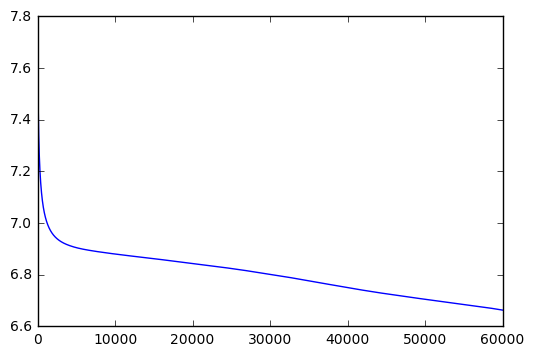

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt_dat = np.genfromtxt('params_2000/ae_train_nonoise/cost_profile.csv', delimiter=',', names = True)
plt.plot(plt_dat)
plt.show()